# West Nile Virus

# Sourcing, loading, and transformation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/Users/ultimateflexer/Desktop/Datasets/predict-west-nile-virus/west_nile/input/train.csv', index_col='Date', parse_dates=True)

In [3]:
weather = pd.read_csv('/Users/ultimateflexer/Desktop/Datasets/predict-west-nile-virus/west_nile/input/weather.csv', index_col='Date', parse_dates=True)

In [4]:
train.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [5]:
train.shape

(10506, 11)

In [6]:
weather.shape

(2944, 21)

In [7]:
weather.head(10)

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68,M,51,57,0,3,-,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52,M,42,47,13,0,-,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56,2,40,48,9,0,0446,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9
2007-05-03,2,67,48,58,M,40,50,7,0,-,...,HZ,M,M,M,0.00,29.46,30.12,12.9,6,13.2
2007-05-04,1,66,49,58,4,41,50,7,0,0444,...,RA,0,M,0.0,T,29.31,30.05,10.4,8,10.8
2007-05-04,2,78,51,M,M,42,50,M,M,-,...,,M,M,M,0.00,29.36,30.04,10.1,7,10.4
2007-05-05,1,66,53,60,5,38,49,5,0,0443,...,,0,M,0.0,T,29.40,30.10,11.7,7,12.0


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10506 entries, 2007-05-29 to 2013-09-26
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Address                 10506 non-null  object 
 1   Species                 10506 non-null  object 
 2   Block                   10506 non-null  int64  
 3   Street                  10506 non-null  object 
 4   Trap                    10506 non-null  object 
 5   AddressNumberAndStreet  10506 non-null  object 
 6   Latitude                10506 non-null  float64
 7   Longitude               10506 non-null  float64
 8   AddressAccuracy         10506 non-null  int64  
 9   NumMosquitos            10506 non-null  int64  
 10  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 984.9+ KB


In [9]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2944 entries, 2007-05-01 to 2014-10-31
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Station      2944 non-null   int64  
 1   Tmax         2944 non-null   int64  
 2   Tmin         2944 non-null   int64  
 3   Tavg         2944 non-null   object 
 4   Depart       2944 non-null   object 
 5   DewPoint     2944 non-null   int64  
 6   WetBulb      2944 non-null   object 
 7   Heat         2944 non-null   object 
 8   Cool         2944 non-null   object 
 9   Sunrise      2944 non-null   object 
 10  Sunset       2944 non-null   object 
 11  CodeSum      2944 non-null   object 
 12  Depth        2944 non-null   object 
 13  Water1       2944 non-null   object 
 14  SnowFall     2944 non-null   object 
 15  PrecipTotal  2944 non-null   object 
 16  StnPressure  2944 non-null   object 
 17  SeaLevel     2944 non-null   object 
 18  ResultSpeed  2944 non-null   f

Clean up the weather data.

In [10]:
weather.columns = weather.columns.str.strip()
weather.replace(['M', 'T', '-'], np.nan, inplace=True)
weather.head()

,Station,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67,14,51,56,0,2,0448,...,,0,NaN,0.0,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68,NaN,51,57,0,3,NaN,...,,NaN,NaN,NaN,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51,-3,42,47,14,0,0447,...,BR,0,NaN,0.0,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52,NaN,42,47,13,0,NaN,...,BR HZ,NaN,NaN,NaN,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56,2,40,48,9,0,0446,...,,0,NaN,0.0,0.00,29.39,30.12,11.7,7,11.9


In [11]:
weather.isnull().sum(axis = 0)

Station           0
Tmax              0
Tmin              0
Tavg             11
Depart         1472
DewPoint          0
WetBulb           4
Heat             11
Cool             11
Sunrise        1472
Sunset         1472
CodeSum           0
Depth          1472
Water1         2944
SnowFall       1472
PrecipTotal       2
StnPressure       4
SeaLevel          9
ResultSpeed       0
ResultDir         0
AvgSpeed          3
dtype: int64

In [12]:
# Water1 is entirely NaN. Depart is relatively uninteresting to the problem with half
# of it's values being NaN. 
weather.drop(['Water1', 'Depart'], axis=1, inplace=True)

# Depth, SnowFall, and PrecipTotal have a lot of zeros, so I am going to infer that the 
# NaNs refer to 0 here.
weather['SnowFall'].fillna(0, inplace=True)
weather['Depth'].fillna(0, inplace=True) 
weather['PrecipTotal'].fillna(0, inplace=True)

# Sunrise and Sunset are also full of NaNs because they are only listed once per day, and
# every two rows have the same date. This is tricky to fix, and these columns are also 
# uninteresting to the data.
weather.drop(['Sunrise', 'Sunset'], axis=1, inplace=True)

# Remaining columns will have rows with NaNs dropped.
weather.dropna(axis=0, inplace=True)

In [13]:
weather['CodeSum'].unique()

array([' ', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [14]:
# This column has a ton of unique categorical values which will be an issue, so best to just
# drop this column. Station is also an irrelevant categorical column.

weather.drop(['CodeSum', 'Station'], axis=1, inplace=True)

In [15]:
# Most other columns are objects, but should be numeric.

cols = ['Tavg', 'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall', 'PrecipTotal', 'StnPressure', 
        'SeaLevel', 'AvgSpeed']
weather[cols] = weather[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [16]:
weather.isnull().sum(axis = 0)

Tmax             0
Tmin             0
Tavg             0
DewPoint         0
WetBulb          0
Heat             0
Cool             0
Depth            0
SnowFall        12
PrecipTotal    315
StnPressure      0
SeaLevel         0
ResultSpeed      0
ResultDir        0
AvgSpeed         0
dtype: int64

In [17]:
# For some reason there ares till NaN values in two columns.

weather['SnowFall'].fillna(0, inplace=True)
weather['PrecipTotal'].fillna(0, inplace=True)
weather.isnull().sum(axis = 0)

Tmax           0
Tmin           0
Tavg           0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Depth          0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [18]:
# Better! Now that I know there are two measurements per day, I will average the two days into
# one row per day.
weather = ((weather + weather.shift(-1)) / 2)[::2]

In [19]:
weather.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,
2007-05-01,83.5,51.0,67.5,51.0,56.5,0.0,2.5,0.0,0.0,0.0,29.140,29.820,2.20,26.0,9.40
2007-05-02,59.5,42.5,51.5,42.0,47.0,13.5,0.0,0.0,0.0,0.0,29.410,30.085,13.15,3.0,13.40
2007-05-03,66.5,47.0,57.0,40.0,49.0,8.0,0.0,0.0,0.0,0.0,29.425,30.120,12.30,6.5,12.55
2007-05-04,66.0,51.0,59.0,39.5,49.5,6.0,0.0,0.0,0.0,0.0,29.355,30.075,11.05,7.5,11.40
2007-05-05,67.0,51.5,59.5,34.5,48.0,5.5,0.0,0.0,0.0,0.0,29.515,30.190,12.80,9.0,13.25


Clean up the train data.

In [20]:
train.head()

,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
Date,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [21]:
# Block and AddressNumberAndStreet are redundant here. AddressAcuracy has to do with how 
# the GeoCoder preformed in creating the previous dropped columns from the Address column. 
# This is irrelevant here.

train.drop(['Block', 'AddressNumberAndStreet', 'AddressAccuracy'], axis=1, inplace=True)

In [22]:
# One hot encode the Species column.

species_cols = pd.get_dummies(train.Species, prefix='Species')
train.drop(columns='Species', inplace=True)
train = pd.concat([train, species_cols], axis=1, join='inner')

In [23]:
train.head()

,Address,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,Species_CULEX RESTUANS,Species_CULEX SALINARIUS,Species_CULEX TARSALIS,Species_CULEX TERRITANS
Date,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,1,0,0,0,0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,0,1,0,0,0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,T007,41.994991,-87.769279,1,0,0,0,0,1,0,0,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,1,0,0,0,1,0,0,0,0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,4,0,0,0,0,1,0,0,0


Join dataframes

In [24]:
df = train.join(weather, how='inner', sort=True)
df.head()

,Address,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,...,Heat,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,1,...,0.0,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,0,...,0.0,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,T007,41.994991,-87.769279,1,0,0,0,0,...,0.0,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,1,0,0,0,1,...,0.0,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,4,0,0,0,0,...,0.0,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0


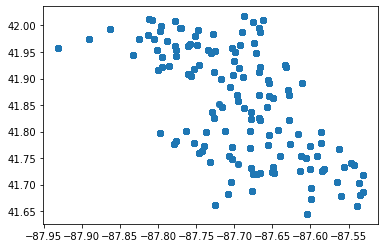

In [25]:
plt.scatter(df['Longitude'], df['Latitude'])

In [26]:
# Divide Longitude and Latitude into regions

bin_labels = [1, 2, 3]
df['Lat_Region'] = pd.qcut(df['Latitude'], q=3, labels=bin_labels)
df['Long_Region'] = pd.qcut(df['Longitude'], q=3, labels=bin_labels)
df.head()

,Address,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,...,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Lat_Region,Long_Region
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,1,...,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,3,1
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,0,...,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,3,1
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,T007,41.994991,-87.769279,1,0,0,0,0,...,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,3,1
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,1,0,0,0,1,...,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,3,1
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,4,0,0,0,0,...,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,3,1


In [27]:
df['Lat_Region'].value_counts()

2    3573
1    3498
3    3342
Name: Lat_Region, dtype: int64

In [28]:
df['Long_Region'].value_counts()

1    3491
3    3468
2    3454
Name: Long_Region, dtype: int64

In [29]:
# The distribution of the regions looks good, turn both columns into one Region and 
# drop the others. Turn this column into values 1-9.

df['Lat_Region'] = pd.to_numeric(df['Lat_Region'])
df['Long_Region'] = pd.to_numeric(df['Long_Region'])
df['Region'] = df.Lat_Region.astype(str) + df.Long_Region.astype(str)
df.drop(['Lat_Region', 'Long_Region'], axis=1, inplace=True)
df['Region'].replace({'11':1, '12':2, '13':3, '21':4, '22':5, '23':6, '31':7, '32':8, 
                     '33':9}, inplace=True)
df.head()

,Address,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,...,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,Region
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,1,...,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,7
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,0,...,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,7
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,T007,41.994991,-87.769279,1,0,0,0,0,...,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,7
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,1,0,0,0,1,...,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,7
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,4,0,0,0,0,...,12.0,0.0,0.0,0.0,29.375,30.065,8.05,17.5,9.0,7


In [30]:
# DataFrame is almost ready for EDA. Time to create lag variables for all of the weather columns.

lags = [1, 7, 14, 21]
df_lagged_weather = pd.DataFrame(data=df[['Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']])
for column in df_lagged_weather.columns:
    for lag in lags:
        df_lagged_weather[str(column) + '_lag_' + str(lag)] = df_lagged_weather[column].shift(lag)

In [31]:
df_lagged_weather.head()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Depth,SnowFall,PrecipTotal,...,ResultSpeed_lag_14,ResultSpeed_lag_21,ResultDir_lag_1,ResultDir_lag_7,ResultDir_lag_14,ResultDir_lag_21,AvgSpeed_lag_1,AvgSpeed_lag_7,AvgSpeed_lag_14,AvgSpeed_lag_21
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,87.5,65.5,77.0,58.5,65.5,0.0,12.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-29,87.5,65.5,77.0,58.5,65.5,0.0,12.0,0.0,0.0,0.0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2007-05-29,87.5,65.5,77.0,58.5,65.5,0.0,12.0,0.0,0.0,0.0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2007-05-29,87.5,65.5,77.0,58.5,65.5,0.0,12.0,0.0,0.0,0.0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2007-05-29,87.5,65.5,77.0,58.5,65.5,0.0,12.0,0.0,0.0,0.0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN


In [32]:
# Looks good, merge this with the rest of the data.

df_lagged_weather.drop(['Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed'], axis=1, inplace=True)
df = pd.concat([df, df_lagged_weather], axis=1)
df.head()

,Address,Street,Trap,Latitude,Longitude,NumMosquitos,WnvPresent,Species_CULEX ERRATICUS,Species_CULEX PIPIENS,Species_CULEX PIPIENS/RESTUANS,...,ResultSpeed_lag_14,ResultSpeed_lag_21,ResultDir_lag_1,ResultDir_lag_7,ResultDir_lag_14,ResultDir_lag_21,AvgSpeed_lag_1,AvgSpeed_lag_7,AvgSpeed_lag_14,AvgSpeed_lag_21
Date,,,,,,,,,,,,,,,,,,,,,
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",N OAK PARK AVE,T002,41.954690,-87.800991,1,0,0,0,0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",N MANDELL AVE,T007,41.994991,-87.769279,1,0,0,0,0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,1,0,0,0,1,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN
2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",W FOSTER AVE,T015,41.974089,-87.824812,4,0,0,0,0,...,NaN,NaN,17.5,NaN,NaN,NaN,9.0,NaN,NaN,NaN


## Exploratory Data Analysis

Being as that the goal of this project is to determine the likelihood of West Nile Virus's pressence in different areas of the city, it would be of great use to visualize a few things.
1. Which species of mosquito carries the virus?
2. Which areas of the city is the virus mostly found?
3. Does the weather patterns on a particular day show any correlation with the virus being present?


In [33]:
# Which species of mosquito carries the virus?
# Here I will subset the data on WnvPresent and investigate the species.

df_WnvPresent = df.loc[df['WnvPresent'] == 1]
df_WnvPresent.shape

(551, 90)

In [34]:
# There are 551 cases of the virus found. Let's see which species are involved.

df_WnvPresent[['Species_CULEX ERRATICUS', 'Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS',
       'Species_CULEX SALINARIUS', 'Species_CULEX TARSALIS',
       'Species_CULEX TERRITANS']].sum(axis=0)

Species_CULEX ERRATICUS             0
Species_CULEX PIPIENS             240
Species_CULEX PIPIENS/RESTUANS    262
Species_CULEX RESTUANS             49
Species_CULEX SALINARIUS            0
Species_CULEX TARSALIS              0
Species_CULEX TERRITANS             0
dtype: int64

In [35]:
# It appears there are only 3 species that have been found to contain the virus. Let's
# further visualize this.

df_species_with_wnv = df_WnvPresent[['Species_CULEX PIPIENS',
       'Species_CULEX PIPIENS/RESTUANS', 'Species_CULEX RESTUANS']]
df_species_with_wnv.rename(columns={'Species_CULEX PIPIENS': 'CULEX PIPIENS', 
                            'Species_CULEX PIPIENS/RESTUANS': 'CULEX PIPIENS/RESTUANS',
                            'Species_CULEX RESTUANS': 'CULEX RESTUANS'}, inplace=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


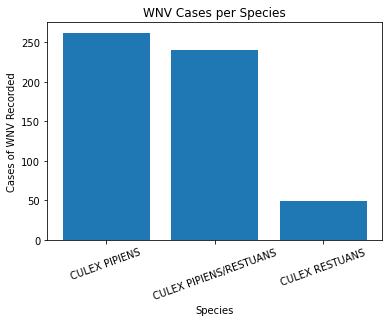

In [36]:
plt.bar(df_species_with_wnv.columns, df_species_with_wnv.value_counts())
plt.title('WNV Cases per Species')
plt.xlabel('Species')
plt.xticks(rotation=20)
plt.ylabel('Cases of WNV Recorded')
plt.show()

In [37]:
# Based on this information, let's see what region of the city contains the most of these
# species.

df_WnvPresent['Region'].value_counts()

7    200
3    118
5     60
4     44
6     39
2     38
8     37
1     14
9      1
Name: Region, dtype: int64

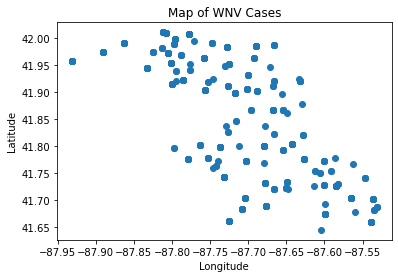

In [38]:
# The highest concentration of the virus is found in Region 7, nearly double that of the second
# highest being Region 3 at 118.

plt.scatter(df_WnvPresent['Longitude'], df_WnvPresent['Latitude'])
plt.title('Map of WNV Cases')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [46]:
# Let's now take a look at the weather patterns for the days that the virus was found ...

df_WnvPresent[['Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']].describe()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,551.0,551.0,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000
mean,83.558076,65.995463,75.034483,62.530853,67.080762,0.243194,10.277677,0.0,0.0,0.145381,29.285499,29.963503,5.366878,17.458258,7.140109
std,6.161042,5.606123,5.302288,6.700472,5.312619,1.506900,4.564590,0.0,0.0,0.226933,0.092590,0.094874,2.512067,8.737073,2.166700
min,58.500000,46.000000,53.000000,39.000000,47.000000,0.000000,0.000000,0.0,0.0,0.000000,28.940000,29.625000,1.550000,1.000000,3.350000
25%,80.500000,62.500000,72.500000,56.500000,63.500000,0.000000,7.500000,0.0,0.0,0.000000,29.235000,29.900000,3.850000,10.000000,5.750000
50%,83.000000,67.500000,75.000000,64.500000,69.000000,0.000000,10.000000,0.0,0.0,0.000000,29.295000,29.970000,4.500000,19.000000,6.600000
75%,88.000000,69.500000,78.000000,68.000000,70.500000,0.000000,13.000000,0.0,0.0,0.290000,29.325000,30.005000,6.900000,23.500000,8.900000
max,96.500000,77.500000,85.500000,73.000000,76.000000,12.000000,20.500000,0.0,0.0,1.235000,29.620000,30.330000,13.350000,34.500000,13.950000


In [48]:
# ... versus the days it was not found.

df_Wnv_Not_Present[['Tmax', 'Tmin', 'Tavg', 'DewPoint',
       'WetBulb', 'Heat', 'Cool', 'Depth', 'SnowFall', 'PrecipTotal',
       'StnPressure', 'SeaLevel', 'ResultSpeed', 'ResultDir', 'AvgSpeed']].describe()

,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
count,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.0,9862.0,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000,9862.000000
mean,81.832640,63.528950,72.935409,59.463141,64.653671,0.901693,8.837102,0.0,0.0,0.119679,29.281997,29.961961,5.956241,17.557037,7.446025
std,8.316824,7.558852,7.535232,7.762816,6.724382,2.708274,5.790087,0.0,0.0,0.238289,0.113996,0.115967,2.805778,8.629524,2.484230
min,57.000000,44.500000,51.000000,39.000000,46.000000,0.000000,0.000000,0.0,0.0,0.000000,28.920000,29.595000,1.550000,1.000000,3.350000
25%,78.000000,59.000000,69.500000,54.000000,60.500000,0.000000,4.500000,0.0,0.0,0.000000,29.205000,29.880000,4.000000,11.000000,5.700000
50%,83.000000,65.500000,74.000000,60.500000,65.500000,0.000000,9.000000,0.0,0.0,0.000000,29.290000,29.970000,5.500000,19.000000,6.950000
75%,88.000000,69.500000,79.500000,66.500000,70.000000,0.000000,14.500000,0.0,0.0,0.097500,29.365000,30.045000,7.600000,24.000000,9.350000
max,96.500000,77.500000,85.500000,73.000000,76.000000,14.000000,20.500000,0.0,0.0,1.235000,29.620000,30.330000,13.350000,35.000000,13.950000


In [54]:
# Comparing the means of each measurement between the two tables, this points to the possible
# conclusion that warmer and wetter weather does indeeed help the virus spread. 